### Nama : Muhammad Wahyu Fadli
### NIM : 09011381823086

#### Source : https://www.kaggle.com/azzion/svm-for-beginners-tutorial?select=train.csv

### Definisi SVM (Support Vector Machine) :
Salah satu metode dalam sebuah supervised learning ialah SVM. Jadi, SVM (Support Vector Machine) adalah sebuah algoritma machine learning yang kebutuhannya digunakan untuk classification dan regression.SVM ini merupakan salah satu algoritma machine learning yang sangat powerful ketika ingin melakukan sebuah classifciation, regression, dan dalam hal mendeteksi outliers. Sebuah SVM ini bisa digunakan untuk klasifikasi dengan cara linear, selain untuk melakukan klasifikasi linear maka SVM secara efisien dapat juga melakukan klasifikasi non-linier dengan menggunakan kernel trick. Ini memungkinkan kita untuk secara implisit memetakan input ke dalam ruang fitur yang berdimensi tinggi.

### Import Library

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import os
print(os.listdir("../Mobile"))

['.ipynb_checkpoints', 'Principle Component Analysis', 'test.csv', 'train.csv', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb']


Hal pertama yang kita lakukan sebelum memulai adalah dengan melakukan import beberapa libray apa saja yang dibutuhkan untuk SVM ini, pemanggilan terhadap library ini biasanya berbeda - beda tergantung dengan kebutuhan. Kali ini library - library yang digunakan adalah, yaitu :
1. <b>numpy<b> library yang berguna sebagai hal - hal yang berkaitan secara matematika dalam menganalisis suatu data
2. <b>pandas<b> library yang berguna sebagai pemberi dalam hal membuat suatu data itu menjadi terstruktur dan memiliki tabel agar menjadi terurut. 
3. <b>matplotlib.pyplot<b> library yang berguna dalam menampilkan atau merepresentasikan suatu data itu ke dalam bentuk plot - plot grafik.
4. <b>seaborn<b> library yang fungsinya sama dengan matplotlib, hanya saja dengan ada tambahan seaborn maka tampilan plot - plot akan lebih sedikit menarik dan bagus.
5. <b>ListedColormap<b> library yang berguna dalam memberikan warna pada tiap - tiap plot ketika ditampilkan.
6. <b>os<b> library yang berguna untuk mengidentifikasi isi dari folder yang akan kita gunakan dalam sebuah sistem operasi.

### DATA PREPROCESSING

In [36]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


Pada kode program diatas bisa dilihat bahwa suatu dataset yang dianalisis dan untuk kebutuhan selanjutnya harus kita masukkan terlebih dahulu ke dalam jupyter notebook, karena dataset yang saya gunakan sudah satu folder dengan dengan jupyter notebook maka saya hanya perlu memasukkan nama filenya. Selanjutnya, tinggal tampilkan datasetnya maka akan terbentuk sebuah tabel yang terstruktur. Ada dua file yaitu train file & test file.

In [37]:
# checking if there is any missing value
train.isnull().sum().max()
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Pada kode program diatas kita ingin melakukan cek pada tiap kolom dataset apak teridentifikasi adanya null vlaue atau tidak.

#### TARGET VALUE ANALYSIS

In [38]:
train['price_range'].describe(), train['price_range'].unique()

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64,
 array([1, 2, 3, 0], dtype=int64))

Pada kode program kita ingin target nilai dalam analysis adalah price_range, jadi kita hanya perlu meenganalisis satu kolom dari banyaknya kolom pada dataset tersebut. Terdapat 4 class  dalam value predicted ini.

<AxesSubplot:>

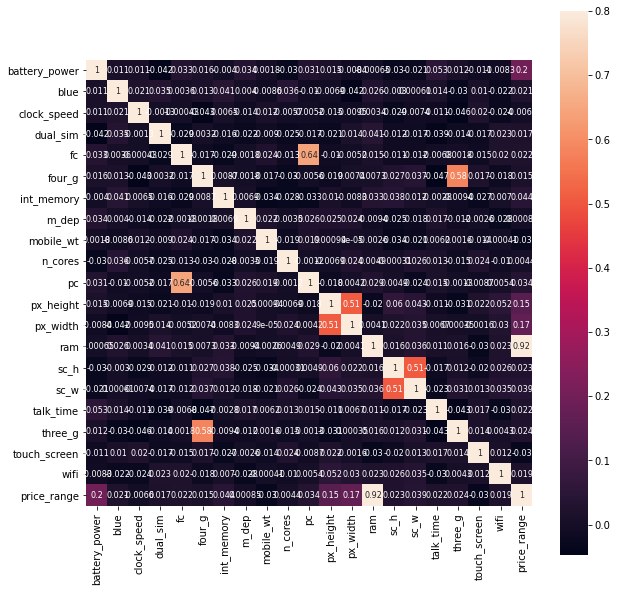

In [39]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, annot_kws={'size':8})

Pada kode program diatas kita menggunakan heatmap dengan bentuk persegi, tiap - tiap subplotnya memiliki nilai - nilai decimal, kecuali diagonalnya yang bernilai 1. Selain itu, kebanyakan warna hitam dikarenakan warna heatmapnya mendekati 0, sedangkan berwarna putih karena warna heatmapnya lebih dari 0.8.

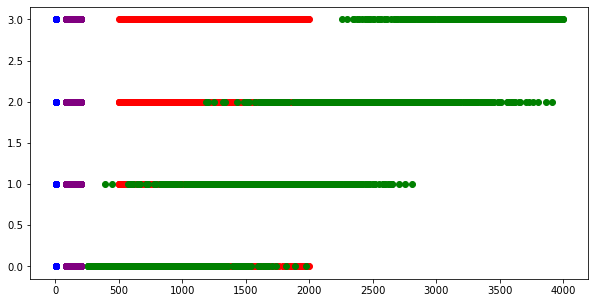

In [40]:
f, ax = plt.subplots(figsize=(10,5))
plt.scatter(y=train['price_range'], x=train['battery_power'], color='red')
plt.scatter(y=train['price_range'], x=train['ram'], color='green')
plt.scatter(y=train['price_range'], x=train['n_cores'], color='blue')
plt.scatter(y=train['price_range'], x=train['mobile_wt'], color='purple')

Pada kode program diatas bisa dilihat beberapa subplot yang berbentuk garis lurus horizontal untuk memetakan titik - titik datanya, bisa dilihat bahwa data predicted (price_range) untuk analysis sebagai train data yang berposisi pada sumbu y. Sedangkan untuk train data lainnya berposisi sebagai sumbu x. Lalu, diberikan masing - masing warna untuk melihat value rangenya. Kita bisa melihat dengan jelas bahwa masing - masing dari kategori ini mempunyai value ranges yang berbeda - beda. 

### SUPPORT VECTOR MACHINES AND METHODS :

## Konsep Dasar :

### Ada 3 hal penting dalam sebuah SVM, yaitu :

#### 1. Hyperplane 
Hyperplane adalah sebuah batasan keputusan (decision boundary) yang memisahkan antara titik - titik data satu dengan data yang lain karena memiliki label class yang berbeda. Jadi, SVM classifier nantinya akan memisahkan data - data dengan menggunakan hyperplane ini dengan jumlah maximum dari margin. Hyperplane ini disebut dengan "maximum margin hyperplane", sedangkan untuk linier classifiernya disebut dengan "maximum margin classifier".

#### 2. Support Vectors
Support Vectors adalah sebuah sampel titik - titik data yang sangat dekat dengan hyperplane. Titik - titik data ini akan menentukan garis pemisah oleh perhitungan margin.

#### 3. Margin
Margin adalah sebuah pemisah antara dua garis yang sangat dekat dengan suatu titik - titik point. Dibawah ini merupakan konsep ilustrasi gambar
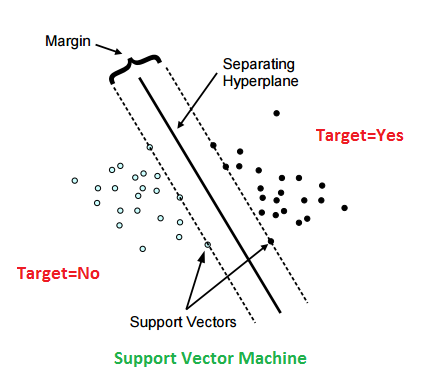

Secara matematis, hyperplane bisa digambarkan dengan persamaan :
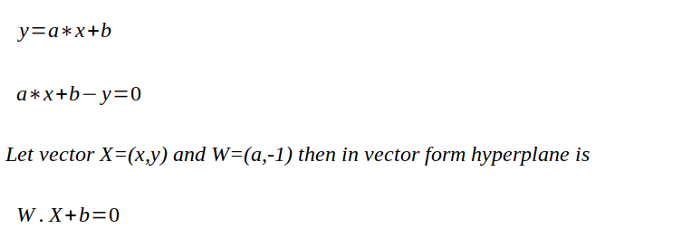

Untuk lebih detailnya bisa dilihat pada ilustrasi gambar di bawah :
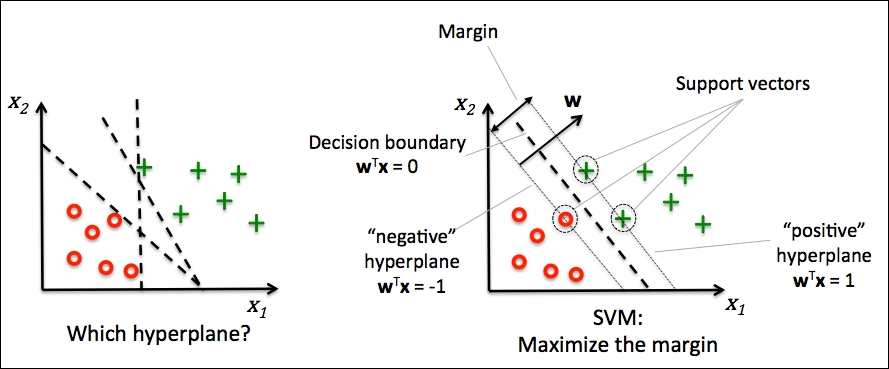

Jadi, bisa dilihat jika dengan menggunakan SVM dengan jelasnya terlihat antara pembatas - pembatas titik - titik datanya. Dari sini kita tahu bahwa untuk sekumpulan label data yang posisinya diatas disebut dengan hyperplane positif, sedangkan yang posisinya dibawah disebut dengan hyperplane negatif. Lalu ada yang namanya "decision boundary sebagai pemisah kedua hyperplane, jika ada salah satu titik data yang melewati decision boundary ini maka akan mempunyai error result. Kalau bisa result error ini harus terminimalisir. Lalu ada support vectors yang mana beberapa titik - titik data sangat dekat dengan hyperplane jadi akan terkakulasi juga oleh margin. Dan yang terakhir ada ada margin seperti yang telah dijelaskan sebelumnya margin pemisah dari dua garis (hyperplane positif & negatif) atau secara sederhananya pemberi jarak.

Untuk hyperplane positive dan negative dilihat dari batasan memiliki persamaan :
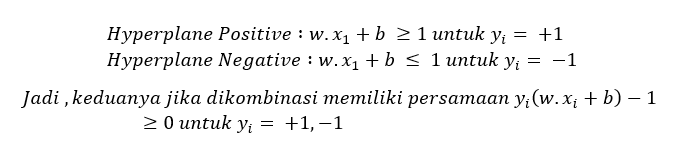

Dari konsep diatas, didapatkan persamaan matematisnya :
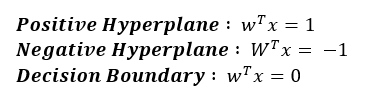
Untuk persamaan dari hyperplane positive & negative dikarenakan keduanya ada support vector yang melewati yang bernilai +1 dan -1

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

y_t = np.array(train['price_range'])
X_t = train
X_t = train.drop(['price_range'], axis=1)
X_t = np.array(X_t)

print("shape of Y"+str(y_t.shape))
print("shape of X"+str(X_t.shape))

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_t = scaler.fit_transform(X_t)

shape of Y(2000,)
shape of X(2000, 20)


Pada kode program diatas dengan fitur dari sci-kit kita akan import SVC yang berarti support vector classifier untuk mengklasifikasi data - data ini dan juga ada import train_test_split untuk memisahkan menjadi data menjadi train data dan test data. Lalu pada kode program bisa lihat train data pada kolom price_range akan dibuat menjadi sebuah array untuk y_t, sedangkan untuk X_t dibuat drop train data dan baru kita bentuk arraynya. Setelah itu print keduanya untuk membentuk shape (bentuk) dari arraynya. Dengan bantuan import MinMaxScaler maka kita akan membuat scaler untuk shape dari X_t ini.

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X_t, y_t, test_size=.20, random_state=42)
print("shape of X Train"+str(X_train.shape))
print("shape of X Test"+str(X_test.shape))
print("shape of Y Train"+str(Y_train.shape))
print("shape of Y Test"+str(Y_test.shape))

shape of X Train(1600, 20)
shape of X Test(400, 20)
shape of Y Train(1600,)
shape of Y Test(400,)


Pada kode program diatas dengan pemanggilan train_test_split sebelumnya  maka sebuah shape sebelumnya dalam kode program kali ini akan dilakukan sebuah split (memilah) suatu data X dan Y menjadi dua bentuk, yaitu train data dan test data. Sehingga ada data X untuk train & test, begitupun juga Y. Dari hasil bisa dilihat bahwa train data digunakan lebih banyak dari test data karena train data inilah yang akan digunakan sebagai sampel untuk dilatih. Jika shape data Y sebelumnya bertotal (2000,) setelah di split maka 1600 nya masuk ke train dan 400 masuk ke test. Sedangkan pada shape X (2000,20) setelah di split maka 1600,20 masuk ke train. Sedangkan 400,20 masuk ke test.

## Kernel Trick

Implementasi dari algoritma SVM ini menggunakan yang namanya kernel. Menggunakan teknik dari suatu kernel disebut dengan "kernel trick". Jadi, sebuah kernel adalah sebuah function memetakan data menjadi dimensi higher-dimensional dimana data dapat dipisahkan. Sebuah transformasi kernel adalah input data yang awalnya low-dimentional menjadi higher-dimentional. Ini sama saja bermaksud mengubah pemilahan yang non-linear menjadi pemilahan yang linear. Dengan adanya kernel trick maka membuat classifier menjadi akurat.

Terdapat 4 kernel yang biasa digunakan, yaitu linear kernel, polynomial kernel, rbf kernel, dan sigmoid kernel.

Kita bisa mendefinisikan kernel function secara matematis menjadi :
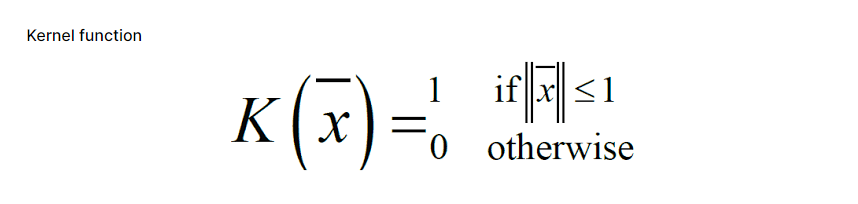

Jadi untuk case kali ini akan digunakan yang namanya kernel yang bertipe linear.

### Linear Kernel

Linear kernel biasanya digunakan ketika data secara linear (garis lurus) terpisah. Maksudnya adalah data - data bisa dipisah dengan menggunakan garis lurus. Selain itu kernel sering sekali dipakai pada tiap case. Penggunaan untuk training pun tergolong lebih cepat dengan kernel ini dikarenakan kita hanya perlu sebuah parameter C regulasi untuk optimasi.  

Berikut di bawah ini ilustrasi dari kernel linear :
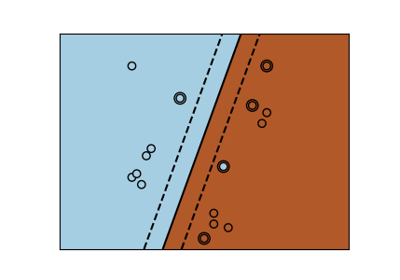


Dari penjelasan di dapatkan persamaan matematis dari kernel linear :
    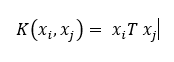

Karena linear kernel ini bersifat high-dimentional maka itulah mengapa pada persamaan matematis ada 'T' yang artinya ada transpose matriks. Sedangkan antara xi dan xj merupakan sebuah vektor yang mana jika secara visualisasi akan berbentuk 2D.

In [43]:
for this_C in [1,3,5,10,40,60,80,100]:
    clf = SVC(kernel='linear', C=this_C).fit(X_train, Y_train)
    scoretrain = clf.score(X_train, Y_train)
    scoretest = clf.score(X_test, Y_test)
    print("Linear SVM value of C:{}, training score:{:2f}, Test Score : {:2f}\n".format(this_C, scoretrain, scoretest))

Linear SVM value of C:1, training score:0.953750, Test Score : 0.960000

Linear SVM value of C:3, training score:0.961875, Test Score : 0.977500

Linear SVM value of C:5, training score:0.968125, Test Score : 0.975000

Linear SVM value of C:10, training score:0.977500, Test Score : 0.967500

Linear SVM value of C:40, training score:0.981250, Test Score : 0.962500

Linear SVM value of C:60, training score:0.981250, Test Score : 0.962500

Linear SVM value of C:80, training score:0.981875, Test Score : 0.970000

Linear SVM value of C:100, training score:0.980625, Test Score : 0.967500



Pada kode program di atas data X dan Y yang telah di split akan dilihat score dari training data dan test data. Digunakan parameter C sebagai optimasi dalam menghitung score tersebut. Selain itu untuk classifiernya digunakan kernel jenis linear.

In [44]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,LeaveOneOut
clf1 = SVC(kernel='linear',C=20).fit(X_train,Y_train)
scores = cross_val_score(clf1,X_train,Y_train,cv=5)
strat_scores = cross_val_score(clf1,X_train,Y_train,cv=StratifiedKFold(5,random_state=10,shuffle=True))


print("The Cross Validation Score :"+str(scores))
print("The Average Cross Validation Score :"+str(scores.mean()))
print("The Stratified Cross Validation Score :"+str(strat_scores))
print("The Average Stratified Cross Validation Score :"+str(strat_scores.mean()))


The Cross Validation Score :[0.95     0.9625   0.95     0.925    0.971875]
The Average Cross Validation Score :0.9518749999999999
The Stratified Cross Validation Score :[0.95625  0.95     0.94375  0.971875 0.94375 ]
The Average Stratified Cross Validation Score :0.953125


Pada kode program diatas, data training akan ditentukan cross validation score. Karena ada empat maka jika dikalkulasikan rata - rata di dapatkan score averagenya juga.

In [45]:
from sklearn.dummy import DummyClassifier

for strat in ['stratified', 'most_frequent', 'prior', 'uniform']:
    dummy_maj = DummyClassifier(strategy=strat).fit(X_train, Y_train)
    print("Train Strategy :{} \n Score :{:.2f}".format(strat, dummy_maj.score(X_train, Y_train)))
    print("Test Strategy :{} \n Score :{:.2f}".format(strat, dummy_maj.score(X_test, Y_test)))

Train Strategy :stratified 
 Score :0.25
Test Strategy :stratified 
 Score :0.22
Train Strategy :most_frequent 
 Score :0.26
Test Strategy :most_frequent 
 Score :0.23
Train Strategy :prior 
 Score :0.26
Test Strategy :prior 
 Score :0.23
Train Strategy :uniform 
 Score :0.24
Test Strategy :uniform 
 Score :0.26


Pada kode program diatas digunakan DummyClassifier untuk melakukan classifier berupa 4 kategori. Digunakan yang namanya strategi. Strategi ini berguna untuk menghasilkan sebuah prediksi, sesudanya prediksi akan didapat sebuah score. 4 kategori ini akan menghasilkan score untuk train & test. 
1. Stratified : Kategori ini menghasilkan sebuah predictions dengan adanya respect oleh training set.
2. most_frequent : Kategori ini selalu menghasilkan sebuah predictions dengan kemunculan selalu label dalam training set.
3. prior : Kategori ini selalu menghasilkan class yang memaksimalkan class yang prior (Sama seperti most_frequent).
4. uniform : Kategori ini selalu menghasilkan sebuah prediksi yang berlabel konstan (tetap).

In [46]:
X = np.array(train.iloc[:,[0,13]])
y = np.array(train['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of Y:"+str(y.shape))
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of Y:(2000,)


Pada kode program diatas antara X dan y dibentuk sebuah array yang mana X itu untuk membentuk array yang untuk train data. Sedangkan, y untuk membuat array dengan train data pada kolom price_range sehingga keduanya akan menghasilkan berupa shape dimensi.

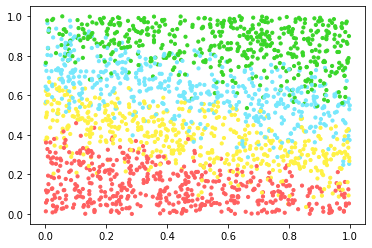

In [47]:
cm_dark = ListedColormap(['#ff6060', '#8282ff', '#fff244', '#4df9b9', '#76e8fc', '#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff', '#ffaa00', '#ffe2a8', '#bfffe7', '#c9f7ff', '#9eff93'])

plt.scatter(X[:,0],X[:,1], c=y, cmap=cm_dark, s=10, label=y)
plt.show()

Pada kode program atas ini hanyalah tiap data - data diberi label berupa warna - warna sehingga mudah diklasifikasi, untuk itulah tadi digunakan import ListedColorMap agar data dipetakan nampak terlihat classifiernya. Tetapi data - data yang telah terlabel tersebut belum benar - benar ter-classifier karena decision boundarynya belum dibuat.

<ipython-input-48-82620f27133b>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


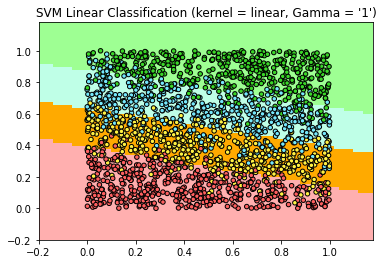

<ipython-input-48-82620f27133b>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=cm_bright)


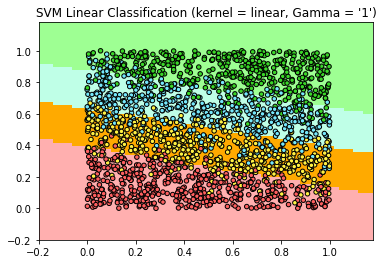

In [48]:
h = .02 
C_param = 1 
for weighs in ['uniform', 'distance']:
    clf1 = SVC(kernel='linear', C=C_param)
    clf1.fit(X,y)
    
    x_min, x_max = X[:,0].min()-.20, X[:,0].max()+.20
    y_min, y_max = X[:,1].min()-.20, X[:,1].max()+.20
    
    xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    
    
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cm_bright)
    
   
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cm_dark, edgecolor='k', s=20)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("SVM Linear Classification (kernel = linear, Gamma = '%s')"% (C_param))
    
    plt.show()

Dari kode program diatas masih dengan kernel linear dan juga bantuan adanya parameter C maka didapatkan optimasi yang sangat baik sehingga error result sedikit dan juga prosesnya lebih cepat. Pada hasil output didapatkan background dengan warna - warni ini merupakan decision boundary. DIbawah ini untuk plot decision boudnary dengan memberikan masing - masing warna agar mudah dilihat.
1. x_min, x_max = X[:,0].min()-.20, X[:,0].max()+.20
2. y_min, y_max = X[:,1].min()-.20, X[:,1].max()+.20
3. xx,yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Secara matematis, kita bisa merepresentasikan sehingga menjadi persamaan :
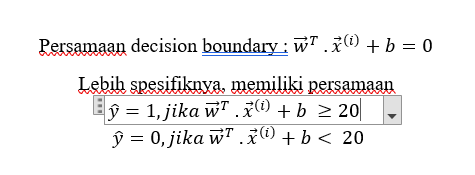

In [49]:
print("The score of the above:" +str(clf1.score(X,y)))

The score of the above:0.825


In [50]:
from sklearn.svm import LinearSVC

for this_C in [1,3,5,10,40,60,80,100]:
    clf2 = LinearSVC(C=this_C).fit(X_train, Y_train)
    scoretrain = clf2.score(X_train, Y_train)
    scoretest = clf2.score(X_test, Y_test)
    print("Linear SVM value of C:{}, training score :{:2f}, Test Score :{:2f} \n".format(this_C, scoretrain,scoretest))

Linear SVM value of C:1, training score :0.846250, Test Score :0.840000 



C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:3, training score :0.864375, Test Score :0.855000 



C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:5, training score :0.867500, Test Score :0.870000 



C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:10, training score :0.875000, Test Score :0.877500 



C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:40, training score :0.846875, Test Score :0.855000 



C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:60, training score :0.850625, Test Score :0.865000 



C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear SVM value of C:80, training score :0.757500, Test Score :0.777500 

Linear SVM value of C:100, training score :0.828125, Test Score :0.822500 



In [51]:
from sklearn.svm import SVR

svr =SVR(kernel='linear', C=1, epsilon=.01).fit(X_train, Y_train)
print("{:2f} is the accuracy of the SV Regressor".format(svr.score(X_train, Y_train)))

0.916779 is the accuracy of the SV Regressor


Pada kode progream diatas didapatkan hasil akurasi yang jika dibulatkan akan menjadi 1, hasil akurasi SV regressor didapatkan dari hasil kernel linear.